In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
import tensorflow as tf
from tensorflow.contrib import learn

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#Import the data from excel

titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

In [4]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
#Baseline Mean

titanic_df['survived'].mean()

0.3819709702062643

In [6]:
titanic_df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [7]:
class_sex_grouping = titanic_df.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

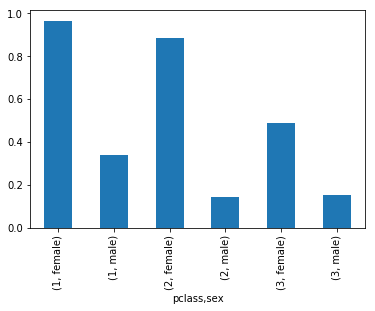

In [8]:
class_sex_grouping['survived'].plot.bar()

In [9]:
titanic_df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [10]:
# Preparing the data for nalysis
# Drop columns with irrelevant and lots of missing data
# Fill in NA for column with missing data
# Drop rows with missing data

titanic_df = titanic_df.drop(['body','cabin','boat'], axis=1)
titanic_df["home.dest"] = titanic_df["home.dest"].fillna("NA")
titanic_df = titanic_df.dropna()
titanic_df.count()

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

In [11]:
# Create a function to preprocess the data
# Use label encoder to convert string data to integers
# Drop non-categorical data that would be difficult to encode
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    processed_df = processed_df.drop(['name','ticket','home.dest'],axis=1)
    return processed_df

In [12]:
processed_df = preprocess_titanic_df(titanic_df)

In [13]:
processed_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


In [14]:
# Set X and Y values
X = processed_df.drop(['survived'], axis = 1).values
y = processed_df['survived']

In [15]:
# Split data into 80/20 train/test split with cross validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=.2)

In [16]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [17]:
# Decision tree training
clf_dt.fit(X_train, y_train)
# Decision tree test
clf_dt.score(X_test, y_test)

0.77990430622009566

In [18]:
#Shuffle the data
shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter = 20, test_size=.2, random_state=0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
    print('Accuracy: %0.4f (+/- %0.2f)' %(scores.mean(), scores.std()))

In [19]:
test_classifier(clf_dt)

Accuracy: 0.7732 (+/- 0.02)


In [20]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.7818 (+/- 0.02)


In [21]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.8201 (+/- 0.02)


In [22]:
eclf = ske.VotingClassifier([('dt',clf_dt), ('rf',clf_rf),('gb',clf_gb)])
test_classifier(eclf)

Accuracy: 0.8048 (+/- 0.02)


In [23]:
# feature_columns = [tf.contrib.layers.real_valued_column("", dimension=7)]
# tf_clf_dnn = learn.DNNClassifier(feature_columns = feature_columns,
#                                  hidden_units=[20,40,20], 
#                                  n_classes = 2,
#                                  model_dir="/tmp/titanic_model")
# tf_clf_dnn.fit(x=X_train, y=y_train, steps=2000)

In [24]:
# accuracy_score = tf_clf_dnn.evaluate(x=X_test, y=y_test, steps=2000)["Accuracy"]
# print('Accuracy: {0:f}'.format(accuracy_score))

In [29]:
processed_df['survived'].groupby(processed_df['survived']).count()

survived
0    618
1    425
Name: survived, dtype: int64